# Reweighting
In this notebook, we perform the reweighting of the parameter distributions of the the HERAPDF parameter values. The workflow is as follows:

1. capture the multivaraite normal distributions of the PDF parameter values. These are the MVN_{Number of samples} distributions, which were produced from output_example_run/minuit_out_processing.ipynb, and saved in Compute_Chi2/MVN_samples.

MV t-distribution instead of MVN for generation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

This multivariate sampling was produced from the best-fit values below from xfitter as the means vector, and the resulting parameters' covariance matrix as the covariance matrix for the multivariate normal

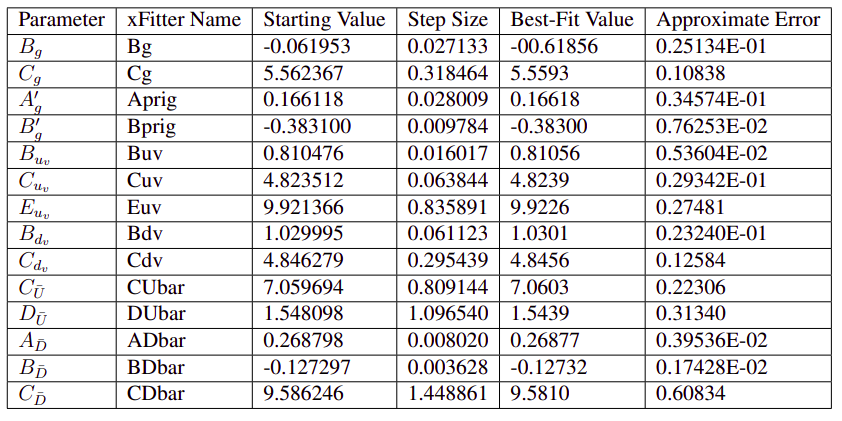

In [11]:
from IPython.display import Image
Image(filename='Best_fit_PDF_values.png')

Text(0.5, 1.0, 'All HERAPDF Parameter Distributions')

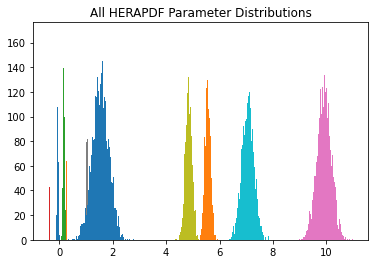

In [4]:
for i in range(13):
    plt.hist(MVN_4000[:,i], bins=100)
plt.title('All HERAPDF Parameter Distributions')

# Unweighted MVN_4000 (version 2.0.1, only HERA data)

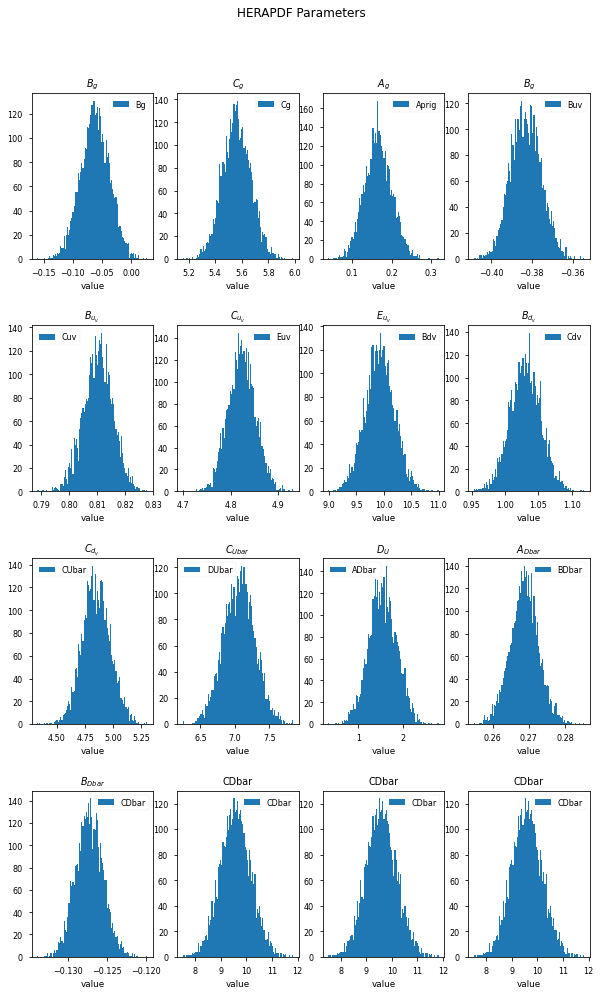

In [3]:
import seaborn as sns
colors=sns.color_palette("rocket",3)
# sns.set_style("white")
plt.style.use('seaborn-paper')
#plt.rc('text', usetex=True)
fig, axes = plt.subplots(nrows=4, ncols=4,figsize=(10,15))
axes[0,0].hist(MVN_4000[:,0],bins=100, label='Bg')
axes[0,1].hist(MVN_4000[:,1],bins=100, label='Cg')
axes[0,2].hist(MVN_4000[:,2],bins=100,label='Aprig')
axes[0,3].hist(MVN_4000[:,3],bins=100, label='Buv')
axes[1,0].hist(MVN_4000[:,4],bins=100, label='Cuv')
axes[1,1].hist(MVN_4000[:,5],bins=100,label='Euv')
axes[1,2].hist(MVN_4000[:,6],bins=100, label='Bdv')
axes[1,3].hist(MVN_4000[:,7],bins=100, label='Cdv')
axes[2,0].hist(MVN_4000[:,8],bins=100, label='CUbar')
axes[2,1].hist(MVN_4000[:,9],bins=100,label='DUbar')
axes[2,2].hist(MVN_4000[:,10],bins=100,label='ADbar')
axes[2,3].hist(MVN_4000[:,11],bins=100,label='BDbar')
axes[3,0].hist(MVN_4000[:,12],bins=100,label='CDbar')
axes[3,1].hist(MVN_4000[:,13],bins=100,label='CDbar')
axes[3,2].hist(MVN_4000[:,13],bins=100,label='CDbar')
axes[3,3].hist(MVN_4000[:,13],bins=100,label='CDbar')
plt.tight_layout(); plt.suptitle('HERAPDF Parameters')
titles = ['$B_g$','$C_g$','$A_g$','$B_g$','$B_{u_v}$','$C_{u_v}$','$E_{u_v}$','$B_{d_v}$','$C_{d_v}$','$C_{Ubar}$','$D_U$','$A_{Dbar}$','$B_{Dbar}$','CDbar','CDbar','CDbar','CDbar']
for i, ax in enumerate(axes.flatten()):
    ax.set(title=titles[i], xlabel='value')
    ax.legend()
# plt.minorticks_on()
# plt.tick_params(direction='in',right=True, top=True)
# plt.tick_params(labelsize=14)
# plt.tick_params(labelbottom=True, labeltop=False, labelright=False, labelleft=True)
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9 , top=0.9, wspace=0.2, hspace=0.4)
#plt.savefig('HERAPDF_params_MVN_4000_unweughted.png', dpi=300, bbox_inches='tight')
plt.show()

2. Get the unminimized $\chi^2$ values from  xFitter, chi2_array_N_{sampels}.npy. This was done in /Compute_chi2/compute_chi2.py. The result is an array of $\chi^2$ values

$\chi^2_k ; \ k=1,...,N_{samples}$

Where at each sample, the $\chi^2$ is calculated for the corresponding parameter set from the multivariate distribution. For example, MVN_4000_chi2[0] is the unminimized $\chi^2$ value for the parameter set MVN_4000[0, :].

3. Calculate the corresponding weights that should be applied to the individual parameter distributions.

$w \propto exp^{-\frac{1}{2} \chi^2}$

The weight for a particular parameter $i$, for a particular point (sample) $k$ is
$$w_k^i = \frac{N_{samples} exp^{-\frac{1}{2} (\chi_k ^2 - E[\chi^2])}}{\mathcal{N}(\theta_i;\mu_i, \sigma_i) \ \sum_{k=1}^{N_{samples}} w_k}$$


where $E[\chi^2] =\frac{1}{N_{samples}}\sum_{k=1}^{N{samples}} \chi_k^2$

In [5]:
mean_chi2 = np.mean(MVN_4000_chi2)
chi2_diff = MVN_4000_chi2 - mean_chi2
chi2_diff, chi2_diff.shape

(array([-0.79983836, -2.53261515,  0.97401289, ..., -3.75245668,
        -3.84346964,  2.80475617]),
 (3999,))

mean (log of ratio)

In [6]:
Bg = MVN_4000[:-1,0]
weights=np.exp(-0.5*(chi2_diff))/Bg
weights = 4000*weights/np.sum(weights)
weights

array([0.26957644, 0.88951986, 1.719643  , ..., 2.70773746, 2.6018625 ,
       0.05811486])

Text(0.5, 1.0, '$w_{B_g}$')

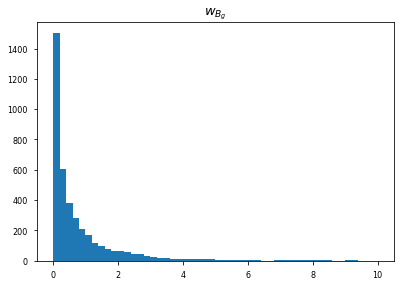

In [9]:
plt.hist(weights.flatten(), bins=50, range=(0,10)); plt.title('$w_{B_g}$', fontsize=13)

* filtering of Weights with $\sigma$
* More points: more plots
* Compute 68% intervals for parameters & comparison with intervals with reweighted parameter densities.


Explore the effect of the weighting on the parameter $B_g$. Histogram unweighted parameter distribution vs weighted parameter distribution

In [24]:
-0.009 + 0.005

-0.003999999999999999

[0.26950905 0.88929748 1.71921309 ... 2.70706052 2.60121203 0.05810033]


array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 7.08942690e-20, 0.00000000e+00, 0.00000000e+00,
       1.61859338e-07, 0.00000000e+00, 1.45818057e-05, 5.09502345e-01,
       1.49487240e-01, 6.31770404e-02, 7.30626462e-01, 1.67751280e+00,
       2.08164119e+00, 2.58343486e+00, 5.01686195e+00, 8.89519010e+00,
       1.24895323e+01, 1.55923492e+01, 1.72173169e+01, 2.72919433e+01,
       5.44194916e+01, 5.42557537e+01, 7.69749796e+01, 9.88527090e+01,
       1.17410803e+02, 1.23983224e+02, 2.00663395e+02, 1.84538901e+02,
       2.00648398e+02, 1.96409940e+02, 1.78968032e+02, 2.13282991e+02,
       1.91864825e+02, 1.86319953e+02, 2.08054277e+02, 1.70132976e+02,
       1.89041876e+02, 1.22808522e+02, 1.62773906e+02, 1.21473337e+02,
       7.94394716e+01, 8.16393037e+01])

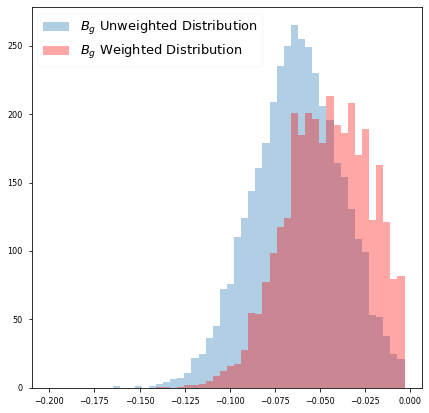

In [25]:
import matplotlib.pyplot as plt
Bg = MVN_4000[:-1,0]
weights_Bg=np.exp(-0.5*(chi2_diff))/Bg
weights_Bg = 3999*weights_Bg/np.sum(weights_Bg)

# plt, axs = plt.subplots(1,2,figsize=(14,7))
# axs[0].hist(Bg.flatten(), range=(-0.2,-0.003),bins=50)
# axs[0].set_title(r'$B_g$ Unweighted Distribution', size=18)
# axs[1].hist(Bg.flatten(), weights=weights_Bg, color='r',range=(-0.2,-0.003),bins=50)
# axs[1].set_title(r'$B_g$ Weighted Distribution', size=18)
# axs[1].set_ylim(0,280)
# axs[0].set_ylim(0,280)
plt.rcParams["figure.figsize"] = [7, 7]
plt.hist(Bg.flatten(), range=(-0.2,-0.003),bins=50, alpha=0.35, label=r'$B_g$ Unweighted Distribution')
n, bins, patches=plt.hist(Bg.flatten(), weights=weights_Bg, color='r',range=(-0.2,-0.003),bins=50, alpha=0.35, label=r'$B_g$ Weighted Distribution')
plt.legend(fontsize=13, loc='best')
print(weights_Bg)
#plt.savefig('1_data_Bg.png')
n

[0.26950905 0.88929748 1.71921309 ... 2.70706052 2.60121203 0.05810033]


array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 7.08942690e-20, 0.00000000e+00, 0.00000000e+00,
       1.61859338e-07, 0.00000000e+00, 1.45818057e-05, 5.09502345e-01,
       1.49487240e-01, 6.31770404e-02, 7.30626462e-01, 1.67751280e+00,
       2.08164119e+00, 2.58343486e+00, 5.01686195e+00, 8.89519010e+00,
       1.24895323e+01, 1.55923492e+01, 1.72173169e+01, 2.72919433e+01,
       5.44194916e+01, 5.42557537e+01, 7.69749796e+01, 9.88527090e+01,
       1.17410803e+02, 1.23983224e+02, 2.00663395e+02, 1.84538901e+02,
       2.00648398e+02, 1.96409940e+02, 1.78968032e+02, 2.13282991e+02,
       1.91864825e+02, 1.86319953e+02, 2.08054277e+02, 1.70132976e+02,
       1.89041876e+02, 1.22808522e+02, 1.62773906e+02, 1.21473337e+02,
       7.94394716e+01, 8.16393037e+01])

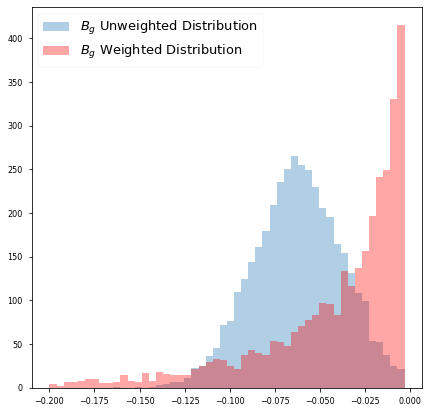

In [26]:
import matplotlib.pyplot as plt
Bg = MVN_4000[:-1,0]
weights_Bg=np.exp(-0.5*(chi2_diff))/Bg
weights_Bg = 3999*weights_Bg/np.sum(weights_Bg)

# plt, axs = plt.subplots(1,2,figsize=(14,7))
# axs[0].hist(Bg.flatten(), range=(-0.2,-0.003),bins=50)
# axs[0].set_title(r'$B_g$ Unweighted Distribution', size=18)
# axs[1].hist(Bg.flatten(), weights=weights_Bg, color='r',range=(-0.2,-0.003),bins=50)
# axs[1].set_title(r'$B_g$ Weighted Distribution', size=18)
# axs[1].set_ylim(0,280)
# axs[0].set_ylim(0,280)
plt.rcParams["figure.figsize"] = [7, 7]
plt.hist(Bg.flatten(), range=(-0.2,-0.003),bins=50, alpha=0.35, label=r'$B_g$ Unweighted Distribution')
plt.hist(Bg.flatten()*weights_Bg, color='r',range=(-0.2,-0.003),bins=50, alpha=0.35, label=r'$B_g$ Weighted Distribution')
plt.legend(fontsize=13, loc='best')
print(weights_Bg)
#plt.savefig('1_data_Bg.png')
n

In [23]:
# a = np.histogram(Bg.flatten(), weights=weights_Bg); plt.hist(a[2], bins=50)

We have the covariance matrix, and we know that the diagonal of this matrix is the standard deviation $\sigma^2_{ii}=diag(\Sigma)$ where i is the index of the parameter. E.g. the standard deviation for the parameter $B_g$ is $\sigma^2_{B_g}=\Sigma_{00}$. 

In [7]:
COV = np.load('COV.npy')
cov_diag = COV.diagonal()
sigma_2=cov_diag
sigma_2_Bg= cov_diag[0]; sigma_Bg=np.sqrt(sigma_2_Bg);sigma_Bg

0.02513961017995307

If we want to estimate upper and lower bounds of $\hat{B_g}$ then we apply the theory of confiddence intervals. For example.... The confidence interval for an estimator $\hat{\theta}$ for  a parameter $\theta$ is $$\hat{\theta}_{L,U}=\bar{\theta} \pm z_{\alpha/2} \frac{\sigma}{\sqrt{n}}$$

in this case we have parameter $\theta=B_g$ so $\bar{\theta}=\bar{B_g}$ and $\sigma_{B_g}=\sqrt{\Sigma_{00}}$

In [12]:
bg_bar = np.mean(Bg) 
print(r'the mean $\bar{B_g}=$ ', bg_bar, '$\sigma_{B_g}=\sqrt{\Sigma_{00}}=$', sigma_Bg)

the mean $\bar{B_g}=$  -0.06186594695890198 $\sigma_{B_g}=\sqrt{\Sigma_{00}}=$ 0.02513961017995307


 

$$\hat{\theta}_{L}=\bar{x}-z_{\alpha / 2} \frac{\sigma}{\sqrt{n}} \quad \text { and } \quad \hat{\theta}_{U}=\bar{x}+z_{\alpha / 2} \frac{\sigma}{\sqrt{n}}$$ Therefore

$$\hat{B_{g,L}}^{Gauss}=\bar{B_g}^{Gauss}-z_{\alpha / 2} \frac{\sigma_{B_g}}{\sqrt{n}} \quad \text { and } \quad \hat{B_{g,U}}^{Gauss}=\bar{B_g}^{Gauss}+z_{\alpha / 2} \frac{\sigma_{B_g}}{\sqrt{n}}$$
For a selection of $z_{\alpha/2}$, $100(1-\alpha) \%$ of the intervals will cover $\bar{B_g}$, therefore for 68% confidence interval, $1-\alpha=0.68 \rightarrow \alpha=0.32$, and $z_{0.16}=1.8$

In [16]:
z_68 = 1.8
B_g_L = bg_bar-(z_68*sigma_Bg/(np.sqrt(4000)))
B_g_U = bg_bar+(z_68*sigma_Bg/(np.sqrt(4000)))
print('the lower and upper bounds of $\hat{B_g}^{Gauss}$ are', B_g_L, 'and ', B_g_U, 'respectively')

the lower and upper bounds of $\hat{B_g}^{Gauss}$ are -0.06258143280781864 and  -0.06115046110998531 respectively


In [17]:
import scipy.stats as st
z_95=st.norm.ppf((1-.95)/2)
z_95

-1.959963984540054

### Select weights that are within 4 $\sigma$ from the mean, i.e. for a parameter $i$ with average weight $\overline{w^i}$ and standard deviation $\sigma^i$, select the weights that satisfy
$w_k^i > \overline{w^i}_k - 4 \times \sigma^i$

$w_k^i < \overline{w^i}_k + 4 \times \sigma^i$

# MVN 4000 VERSION 2.0.1, ONLY HERA DATA

[ 1.16839473  0.68159737 16.58484193  4.70165553  1.00089032  2.81469581
  1.24902948  0.70610641  1.09661467  0.13312279]
UNFILTERED WEIGHTS

((3999, 14), '\n\n', array([ 1.16839473,  0.68159737, 16.58484193, ...,  0.61264425,
        0.5374768 ,  0.56048018]), '\n\n', 1.0, '\n\n', 6.350169414795807)

 

 FILTERED WEIGHTS

((14,), '\n\n', array([ 1.16839473,  0.68159737, 16.58484193, ...,  0.61264425,
        0.5374768 ,  0.56048018]), '\n\n', 0.9336618528058735, '\n\n', 1.3733489731160373)
('shapes are', (3991,), (3999,))


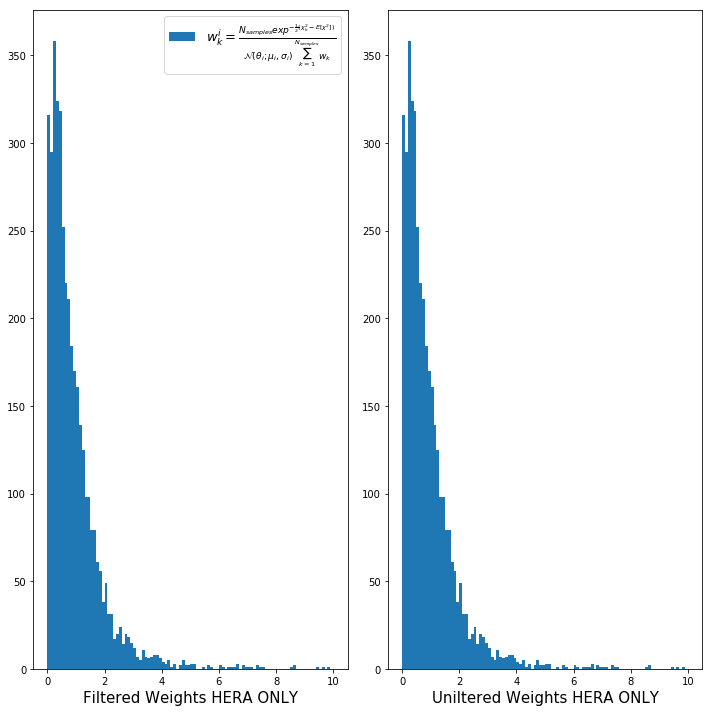

In [25]:
MVN_4000= np.load('/home/ali/Desktop/Pulled_Github_Repositories/NNPDF_Uncertainty/Compute_chi2/MVN_samples/MVN_4000.npy')
MVN_4000_chi2 = np.load('/home/ali/Desktop/Pulled_Github_Repositories/NNPDF_Uncertainty/Compute_chi2/chi2_array_4000.npy')
# dof = 377
# MVN_4000_chi2_per_dof=MVN_4000_chi2/377
# MVN_4000_chi2

mean_chi2 = np.mean(MVN_4000_chi2)
chi2_diff = abs(MVN_4000_chi2 - mean_chi2)
chi2_diff, chi2_diff.shape
weights = np.empty((3999, 14))
for i in range(14):
    weights[:,i] = np.exp(-0.5 * (chi2_diff))/MVN_4000[:-1,i]
    weights[:,i] = 3999 * weights[:,i]/np.sum(weights[:,i])
    #weights[:,i] = sp.special.expit(weights[:,i])
print(weights[:10,0])


#FILTER WEIGHTS
filtered_weights=[]

for i in range(14):
    #mean weight for parameter i
    mean_weight_i = np.mean(weights[:,i])
    std_weight_i = np.std(weights[:,i])
    final_list = [x for x in weights[:,i] if (x > mean_weight_i - 4 * std_weight_i)]
    final_list = [x for x in final_list if (x < mean_weight_i + 4 * std_weight_i)]
    filtered_weights.append(np.array(final_list))
    
filtered_weights_ = [np.array(x) for x in filtered_weights]
print('UNFILTERED WEIGHTS\n')
print(weights.shape, '\n\n', weights[:,0], '\n\n', weights[:,0].mean(), '\n\n', weights[:,0].std())
print('\n \n\n FILTERED WEIGHTS\n')
print(np.array(filtered_weights_).shape, '\n\n', filtered_weights_[0], '\n\n', filtered_weights_[0].mean(), '\n\n', filtered_weights_[0].std())
fig, ax = plt.subplots(1, 2, figsize=(10,10))
ax[0].hist(filtered_weights_[0], bins=100, range=(0,10), label=r'$w_k^i = \frac{N_{samples} exp^{-\frac{1}{2} (\chi_k ^2 - E[\chi^2])}}{\mathcal{N}(\theta_i;\mu_i, \sigma_i) \ \sum_{k=1}^{N_{samples}} w_k}$')
ax[0].set_xlabel('Filtered Weights HERA ONLY', fontsize=15)
ax[1].hist(weights[:,0], bins=100, range=(0,10), label=r'$w_k^i = \frac{N_{samples} exp^{-\frac{1}{2} (\chi_k ^2 - E[\chi^2])}}{\mathcal{N}(\theta_i;\mu_i, \sigma_i) \ \sum_{k=1}^{N_{samples}} w_k}$')
ax[1].set_xlabel('Uniltered Weights HERA ONLY', fontsize=15)
ax[0].legend(fontsize=13); ax[0].legend(fontsize=13)
print('shapes are', filtered_weights[0].shape, weights[:,0].shape)
plt.tight_layout()

So this method does not work because the filtered and unfiltered weights have different shapes. Let's try using a tuple:

for each parameter $i$ $(i=1,...,14)$, make a tuple $T_i$ which contains the list of parameter values at that point and the list of weights of the paramter at that point. 

$$T_i = (\theta_i^k, w_i^k) \ , \ k=1,...N$$
where $N$ is the length of the sampling distribbution (in this case it's 3999). For example, T[0] gives (list of parameters Bg, list of weights of Bg), so you can access the parameter values for Bg as T[0][0] and the weights as T[0][1]

In [49]:
np.array(list_of_tuples[i][1])
np.einsum()

array([0.53459136, 1.1976043 , 0.20373649, ..., 2.31218753, 2.5328438 ,
       0.09189074])

# MVN 4000 MASTER VERSION ALL DATA

In [26]:
import numpy as np;
MVN_4000_MASTER = np.load('/home/ali/Desktop/Pulled_Github_Repositories/NNPDF_Uncertainty/master_version/samples/MVN_4000_MASTER.npy')
chi2_array_ALL_DATA_4k = np.load('/home/ali/Desktop/Pulled_Github_Repositories/NNPDF_Uncertainty/master_version/local/ALL_DATA_5k/chi2_array_ALL_DATA_4k.npy')

#to avoid overflow take data type as float 128 to handle exponentiation
chi2_array_ALL_DATA_4k = chi2_array_ALL_DATA_4k.astype(np.float128)
MVN_4000_MASTER = MVN_4000_MASTER.astype(np.float128)
#np.seterr(divide='ignore', invalid='ignore', over='ignore')

#take log
chi2_array_ALL_DATA_4k=np.log(chi2_array_ALL_DATA_4k)

mean_chi2 = np.mean(chi2_array_ALL_DATA_4k)
chi2_diff = abs(chi2_array_ALL_DATA_4k - mean_chi2)
chi2_diff, chi2_diff.shape
weights = np.empty((4000, 14))
for i in range(14):
    weights[:,i] = np.exp(-0.5 * (chi2_diff))/MVN_4000_MASTER[:,i]
    weights[:,i] = 4000 * weights[:,i]/np.sum(weights[:,i])
    #weights[:,i] = sp.special.expit(weights[:,i])
print(weights[:10,0])


[1.04451736 1.03882333 1.04402049 1.0115674  1.03896972 1.01767461
 1.04621885 1.03166577 1.05104684 1.06415874]


In [2]:
#for parameter i: pairs_i = (param_val, weight_i, std_i), then select weights

list_of_tuples = []

        
for i in range(14):
    param_list_i=[]
    weight_list_i = []
    for k in range(4000):
        param_value = MVN_4000_MASTER[k, i] #at the kth point, for parameter i
        weight_value = weights[k,i]
        std_weight_value = np.std(weights[:,i])
        mean_weight = np.mean(weights[:,i])
        if (weight_value > (mean_weight - 6*std_weight_value)) and (weight_value < (mean_weight + 6*std_weight_value)):
            #if weight_value < (mean_weight + 4*std_weight_value):

            param_list_i.append(param_value)
            weight_list_i.append(weight_value)
    tuple_i = (param_list_i, weight_list_i)
    list_of_tuples.append(tuple_i)
#len(list_of_tuples)                
#list_of_tuples[1]

In [3]:
# import matplotlib.pyplot as plt
# import matplotlib.pyplot as plt
# plt.rcParams.update({'font.size': 17})

# params = np.array([-0.61856E-01 ,5.5593, 0.16618,-0.38300,0.81056,4.8239,9.9226,1.0301,4.8456,7.0603,1.5439 , 0.26877,-0.12732 , 9.5810])

# # weights = np.empty((3999, 14))
# # for i in range(14):
# #     weights[:,i] = np.exp(-0.5 * (chi2_diff))/params[i]
# #     weights[:,i] = 3999 * weights[:,i]/np.sum(weights[:,i])
# # print(weights[:,0])


# #There could be one weights that happens to be very large at 0
# titles = ['$B_g$','$C_g$','$A_g$','$B_g$','$B_{u_v}$','$C_{u_v}$','$E_{u_v}$','$B_{d_v}$','$C_{d_v}$','$C_{Ubar}$','$D_U$','$A_{Dbar}$','$B_{Dbar}$','$C_{Dbar}$']
# #['Bg','Cg','Aprig','Bprig','Buv','Cuv','Euv','Bdv','Cdv','CUbar','DUbar','ADbar','BDbar','CDbar']
# #['$B_g$','$C_g$','$A_g$','$B_g$','$B_{u_v}$','$C_{u_v}$','$E_{u_v}$','$B_{d_v}$','$C_{d_v}$','$C_{Ubar}$','$D_U$','$A_{Dbar}$','$B_{Dbar}$','CDbar']


# fig, axes = plt.subplots(nrows=14, ncols=3, figsize=(40,60))
# #for i, ax in enumerate(axes.flatten()):

# #PLOT UNWEIGHTED DISTRIBUTIONS (AT COL 0)
# for i in range(14):
#     axes[i,0].hist(list_of_tuples[i][0], bins=50)

#     #axes[i,0].set(title=titles[i] + ' Unweighted', xlabel='value')
#     axes[i,0].set_title(titles[i] + ' Unweighted', size=25)
#     axes[i,0].set_xlabel('value', size=20)
#     axes[i,0].set_ylim(0,320)

# #PLOT WEIGHTED DISTRIBUTIONS
# for i in range(14):
#     axes[i,1].hist(MVN_4000_MASTER[:,i].flatten(), weights=weights[:,i], bins=50, color = 'r')
#     #axes[i,1].set(title=titles[i] + ' Weighted', xlabel='value')
#     axes[i,1].set_title(titles[i] + ' Weighted Unfiltered',size=25)
#     axes[i,1].set_xlabel('value', size=20)
#     axes[i,1].set_ylim(0,320)
    
# ##FILTER WEIGHTS

# ##PLOT WEIGHTED AND FILTERED    
                  
    
#     #axes[i,0].legend()
# # # plt.minorticks_on()
# plt.tight_layout()
# #plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9 , top=0.9, wspace=0.2, hspace=0.4)
# #plt.savefig('all_data_4k_all_params_FILTERED.png')
# plt.show()

In [38]:
import numpy as np
import matplotlib.pyplot as plt
#import scipy as sp

MVN_4000_MASTER = np.load('/home/ali/Desktop/Pulled_Github_Repositories/NNPDF_Uncertainty/master_version/samples/MVN_4000_MASTER.npy')
chi2_array_ALL_DATA_4k = np.load('/home/ali/Desktop/Pulled_Github_Repositories/NNPDF_Uncertainty/master_version/local/ALL_DATA_5k/chi2_array_ALL_DATA_4k.npy')

#to avoid overflow take data type as float 128 to handle exponentiation
chi2_array_ALL_DATA_4k = chi2_array_ALL_DATA_4k.astype(np.float128)
MVN_4000_MASTER = MVN_4000_MASTER.astype(np.float128)

#ignore overflow and division errors
np.seterr(divide='ignore', invalid='ignore', over='ignore')

#take log
#chi2_array_ALL_DATA_4k=np.log(chi2_array_ALL_DATA_4k)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))


mean_chi2 = np.mean(chi2_array_ALL_DATA_4k)
chi2_diff = sigmoid(abs(chi2_array_ALL_DATA_4k - mean_chi2))

#chi2_diff, chi2_diff.shape
weights = np.empty((4000, 14))
for i in range(14):
    weights[:,i] = np.exp(-0.5 * (chi2_diff))/MVN_4000_MASTER[:,i]
    weights[:,i] = 4000 * weights[:,i]/np.sum(weights[:,i])
#    weights[:,i] = sp.special.expit(weights[:,i])
print(weights[:10,0])

#for parameter i: pairs_i = (param_val, weight_i, std_i), then select weights

list_of_tuples = []

        
for i in range(14):
    param_list_i=[]
    weight_list_i = []
    for k in range(4000):
        param_value = MVN_4000_MASTER[k, i] #at the kth point, for parameter i
        weight_value = weights[k,i]
        std_weight_value = np.std(weights[:,i])
        mean_weight = np.mean(weights[:,i])
        if (weight_value > (mean_weight - 5*std_weight_value)) and (weight_value < (mean_weight + 5*std_weight_value)):
            #if weight_value < (mean_weight + 4*std_weight_value):

            param_list_i.append(param_value)
            weight_list_i.append(weight_value)
    tuple_i = (param_list_i, weight_list_i)
    list_of_tuples.append(tuple_i)
#len(list_of_tuples)                
#list_of_tuples[1]

import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
#plt.rcParams.update({'font.size': 17})

params = np.array([-0.61856E-01 ,5.5593, 0.16618,-0.38300,0.81056,4.8239,9.9226,1.0301,4.8456,7.0603,1.5439 , 0.26877,-0.12732 , 9.5810])

# weights = np.empty((3999, 14))
# for i in range(14):
#     weights[:,i] = np.exp(-0.5 * (chi2_diff))/params[i]
#     weights[:,i] = 3999 * weights[:,i]/np.sum(weights[:,i])
# print(weights[:,0])
#There could be one weights that happens to be very large at 0
titles = ['$B_g$','$C_g$','$A_g$','$B_g$','$B_{u_v}$','$C_{u_v}$','$E_{u_v}$','$B_{d_v}$','$C_{d_v}$','$C_{Ubar}$','$D_U$','$A_{Dbar}$','$B_{Dbar}$','$C_{Dbar}$']
#['Bg','Cg','Aprig','Bprig','Buv','Cuv','Euv','Bdv','Cdv','CUbar','DUbar','ADbar','BDbar','CDbar']
#['$B_g$','$C_g$','$A_g$','$B_g$','$B_{u_v}$','$C_{u_v}$','$E_{u_v}$','$B_{d_v}$','$C_{d_v}$','$C_{Ubar}$','$D_U$','$A_{Dbar}$','$B_{Dbar}$','CDbar']


fig, axes = plt.subplots(nrows=14, ncols=3, figsize=(20,30))
#for i, ax in enumerate(axes.flatten()):

#PLOT UNWEIGHTED DISTRIBUTIONS (AT COL 0)
for i in range(14):
    #axes[i,0].hist(list_of_tuples[i][0], bins=50)
    axes[i,0].hist(MVN_4000_MASTER[:,i].flatten(), bins=50, color='g')

    #axes[i,0].set(title=titles[i] + ' Unweighted', xlabel='value')
    axes[i,0].set_title(titles[i] + ' Unweighted')
    axes[i,0].set_xlabel('value')
    axes[i,0].set_ylim(0,320)

#PLOT WEIGHTED DISTRIBUTIONS
for i in range(14):
    axes[i,1].hist(MVN_4000_MASTER[:,i].flatten(), weights=weights[:,i], bins=50, color = 'r')
    #axes[i,1].set(title=titles[i] + ' Weighted', xlabel='value')
    axes[i,1].set_title(titles[i] + ' Weighted Unfiltered')
    axes[i,1].set_xlabel('value')
    axes[i,1].set_ylim(0,320)
    
##FILTER WEIGHTS

##PLOT WEIGHTED AND FILTERED    
for i in range(14):
    axes[i,2].hist(np.array(list_of_tuples[i][0]), weights=np.array(list_of_tuples[i][1]), bins=50, color = 'r')
    #axes[i,1].set(title=titles[i] + ' Weighted', xlabel='value')
    axes[i,2].set_title(titles[i] + ' Weighted Filtered')
    axes[i,2].set_xlabel('value')
    axes[i,2].set_ylim(0,320)
    
    #axes[i,0].legend()
# # plt.minorticks_on()
#plt.tight_layout()
plt.subplots_adjust(left=0.125, bottom=0, right=0.9 , top=0.9, wspace=0.2, hspace=0.9)
#plt.savefig('all_data_4k_all_params_FILTERED.png')
plt.show()

[1.00296172 0.99112065 1.00416102 1.0132988  1.00661183 1.01328557
 1.01892353 1.00228407 1.00055347 0.98891512]


[1.00296172 0.99112065 1.00416102 1.0132988  1.00661183 1.01328557
 1.01892353 1.00228407 1.00055347 0.98891512]


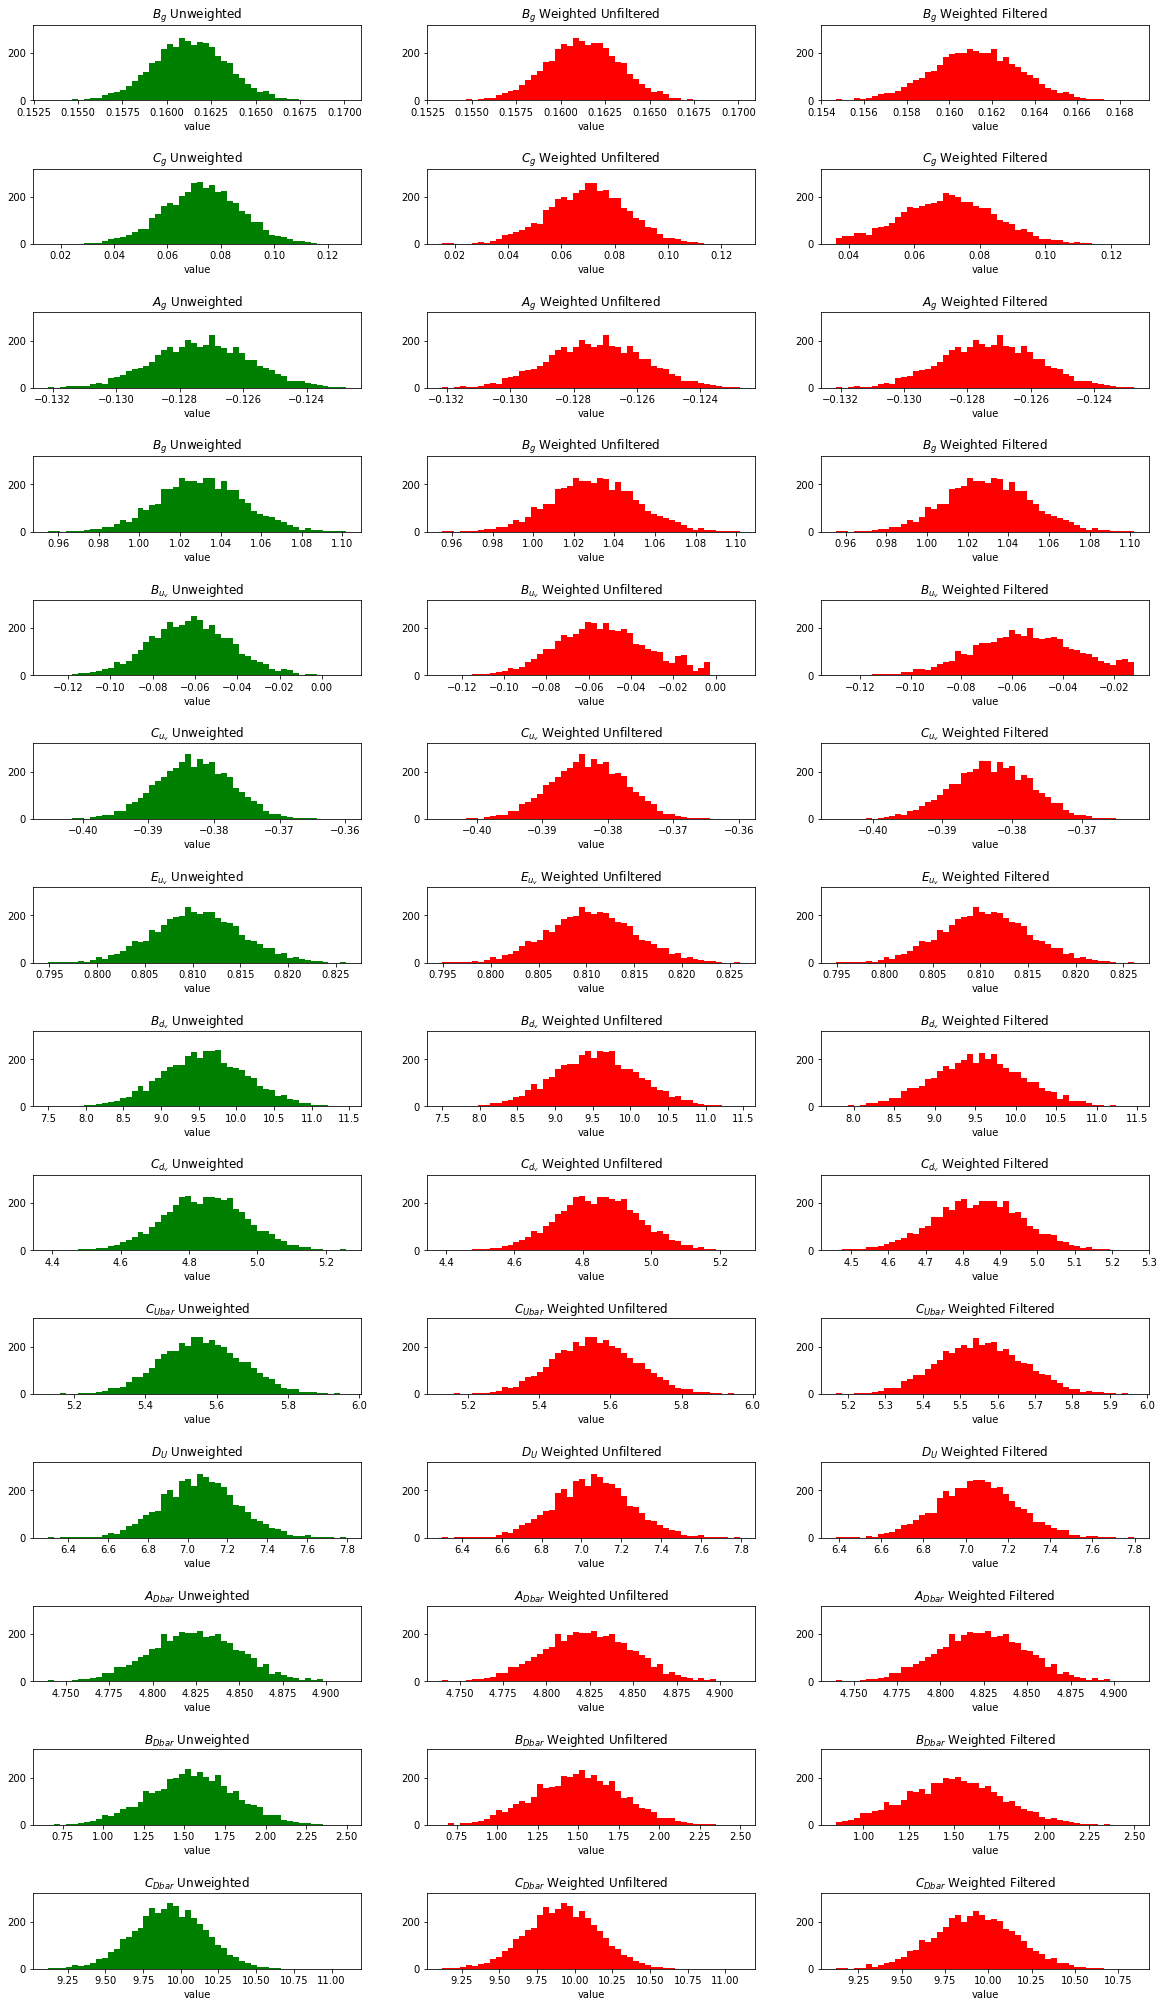

In [27]:
import numpy as np
import matplotlib.pyplot as plt
#import scipy as sp

MVN_4000_MASTER = np.load('/home/ali/Desktop/Pulled_Github_Repositories/NNPDF_Uncertainty/master_version/samples/MVN_4000_MASTER.npy')
chi2_array_ALL_DATA_4k = np.load('/home/ali/Desktop/Pulled_Github_Repositories/NNPDF_Uncertainty/master_version/local/ALL_DATA_5k/chi2_array_ALL_DATA_4k.npy')

#to avoid overflow take data type as float 128 to handle exponentiation
chi2_array_ALL_DATA_4k = chi2_array_ALL_DATA_4k.astype(np.float128)
MVN_4000_MASTER = MVN_4000_MASTER.astype(np.float128)

#ignore overflow and division errors
np.seterr(divide='ignore', invalid='ignore', over='ignore')

#take log
#chi2_array_ALL_DATA_4k=np.log(chi2_array_ALL_DATA_4k)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))


mean_chi2 = np.mean(chi2_array_ALL_DATA_4k)
chi2_diff = sigmoid(abs(chi2_array_ALL_DATA_4k - mean_chi2))

#chi2_diff, chi2_diff.shape
weights = np.empty((4000, 14))
for i in range(14):
    weights[:,i] = np.exp(-0.5 * (chi2_diff))/MVN_4000_MASTER[:,i]
    weights[:,i] = 4000 * weights[:,i]/np.sum(weights[:,i])
#    weights[:,i] = sp.special.expit(weights[:,i])
print(weights[:10,0])

#for parameter i: pairs_i = (param_val, weight_i, std_i), then select weights to be within 4 std of the weights mean. (only take parameter values corresponding to those weights)

list_of_tuples = []
        
for i in range(14):
    param_list_i=[]
    weight_list_i = []
    for k in range(4000):
        param_value = MVN_4000_MASTER[k, i] #at the kth point, for parameter i
        weight_value = weights[k,i]
        std_weight_value = np.std(weights[:,i])
        mean_weight = np.mean(weights[:,i])
        if (weight_value > (mean_weight - 4*std_weight_value)) and (weight_value < (mean_weight + 4*std_weight_value)):
            #if weight_value < (mean_weight + 4*std_weight_value):

            param_list_i.append(param_value)
            weight_list_i.append(weight_value)
    tuple_i = (param_list_i, weight_list_i)
    list_of_tuples.append(tuple_i)
#len(list_of_tuples)                
#list_of_tuples[1]

import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
#plt.rcParams.update({'font.size': 17})

params = np.array([-0.61856E-01 ,5.5593, 0.16618,-0.38300,0.81056,4.8239,9.9226,1.0301,4.8456,7.0603,1.5439 , 0.26877,-0.12732 , 9.5810])

# weights = np.empty((3999, 14))
# for i in range(14):
#     weights[:,i] = np.exp(-0.5 * (chi2_diff))/params[i]
#     weights[:,i] = 3999 * weights[:,i]/np.sum(weights[:,i])
# print(weights[:,0])
#There could be one weights that happens to be very large at 0
titles = ['$B_g$','$C_g$','$A_g$','$B_g$','$B_{u_v}$','$C_{u_v}$','$E_{u_v}$','$B_{d_v}$','$C_{d_v}$','$C_{Ubar}$','$D_U$','$A_{Dbar}$','$B_{Dbar}$','$C_{Dbar}$']
#['Bg','Cg','Aprig','Bprig','Buv','Cuv','Euv','Bdv','Cdv','CUbar','DUbar','ADbar','BDbar','CDbar']
#['$B_g$','$C_g$','$A_g$','$B_g$','$B_{u_v}$','$C_{u_v}$','$E_{u_v}$','$B_{d_v}$','$C_{d_v}$','$C_{Ubar}$','$D_U$','$A_{Dbar}$','$B_{Dbar}$','CDbar']


fig, axes = plt.subplots(nrows=14, ncols=3, figsize=(20,30))
#for i, ax in enumerate(axes.flatten()):

#PLOT UNWEIGHTED DISTRIBUTIONS (AT COL 0)
for i in range(14):
    #axes[i,0].hist(list_of_tuples[i][0], bins=50)
    axes[i,0].hist(MVN_4000_MASTER[:,i].flatten(), bins=50, color='g')

    #axes[i,0].set(title=titles[i] + ' Unweighted', xlabel='value')
    axes[i,0].set_title(titles[i] + ' Unweighted')
    axes[i,0].set_xlabel('value')
    axes[i,0].set_ylim(0,320)

#PLOT WEIGHTED DISTRIBUTIONS
for i in range(14):
    axes[i,1].hist(MVN_4000_MASTER[:,i].flatten(), weights=weights[:,i], bins=50, color = 'r')
    #axes[i,1].set(title=titles[i] + ' Weighted', xlabel='value')
    axes[i,1].set_title(titles[i] + ' Weighted Unfiltered')
    axes[i,1].set_xlabel('value')
    axes[i,1].set_ylim(0,320)
    
##FILTER WEIGHTS

##PLOT WEIGHTED AND FILTERED    
for i in range(14):
    axes[i,2].hist(np.array(list_of_tuples[i][0]), weights=np.array(list_of_tuples[i][1]), bins=50, color = 'r')
    #axes[i,1].set(title=titles[i] + ' Weighted', xlabel='value')
    axes[i,2].set_title(titles[i] + ' Weighted Filtered')
    axes[i,2].set_xlabel('value')
    axes[i,2].set_ylim(0,320)
    
    #axes[i,0].legend()
# # plt.minorticks_on()
#plt.tight_layout()
plt.subplots_adjust(left=0.125, bottom=0, right=0.9 , top=0.9, wspace=0.2, hspace=0.9)
#plt.savefig('all_data_4k_all_params_FILTERED.png')
plt.show()

## For the runs using ALL DATA available to xFitter, if we use the same weight equation, i.e.
The weight for a particular parameter $i$, for a particular point (sample) $k$ is
$$w_k^i = \frac{N_{samples} exp^{-\frac{1}{2} (\chi_k ^2 - E[\chi^2])}}{\mathcal{N}(\theta_i;\mu_i, \sigma_i) \ \sum_{k=1}^{N_{samples}} w_k}$$

then we get massive underflows, and the weights are eighter 0 or infinite, since the $\chi^2$ values are so large, hence I am taking the log of the $\chi^2$ difference, i.e

$$w_k^i = \frac{N_{samples} exp^{-\frac{1}{2} (\log[\chi_k ^2 - E[\chi^2])]}}{\mathcal{N}(\theta_i;\mu_i, \sigma_i) \ \sum_{k=1}^{N_{samples}} w_k}$$

### is this justified?

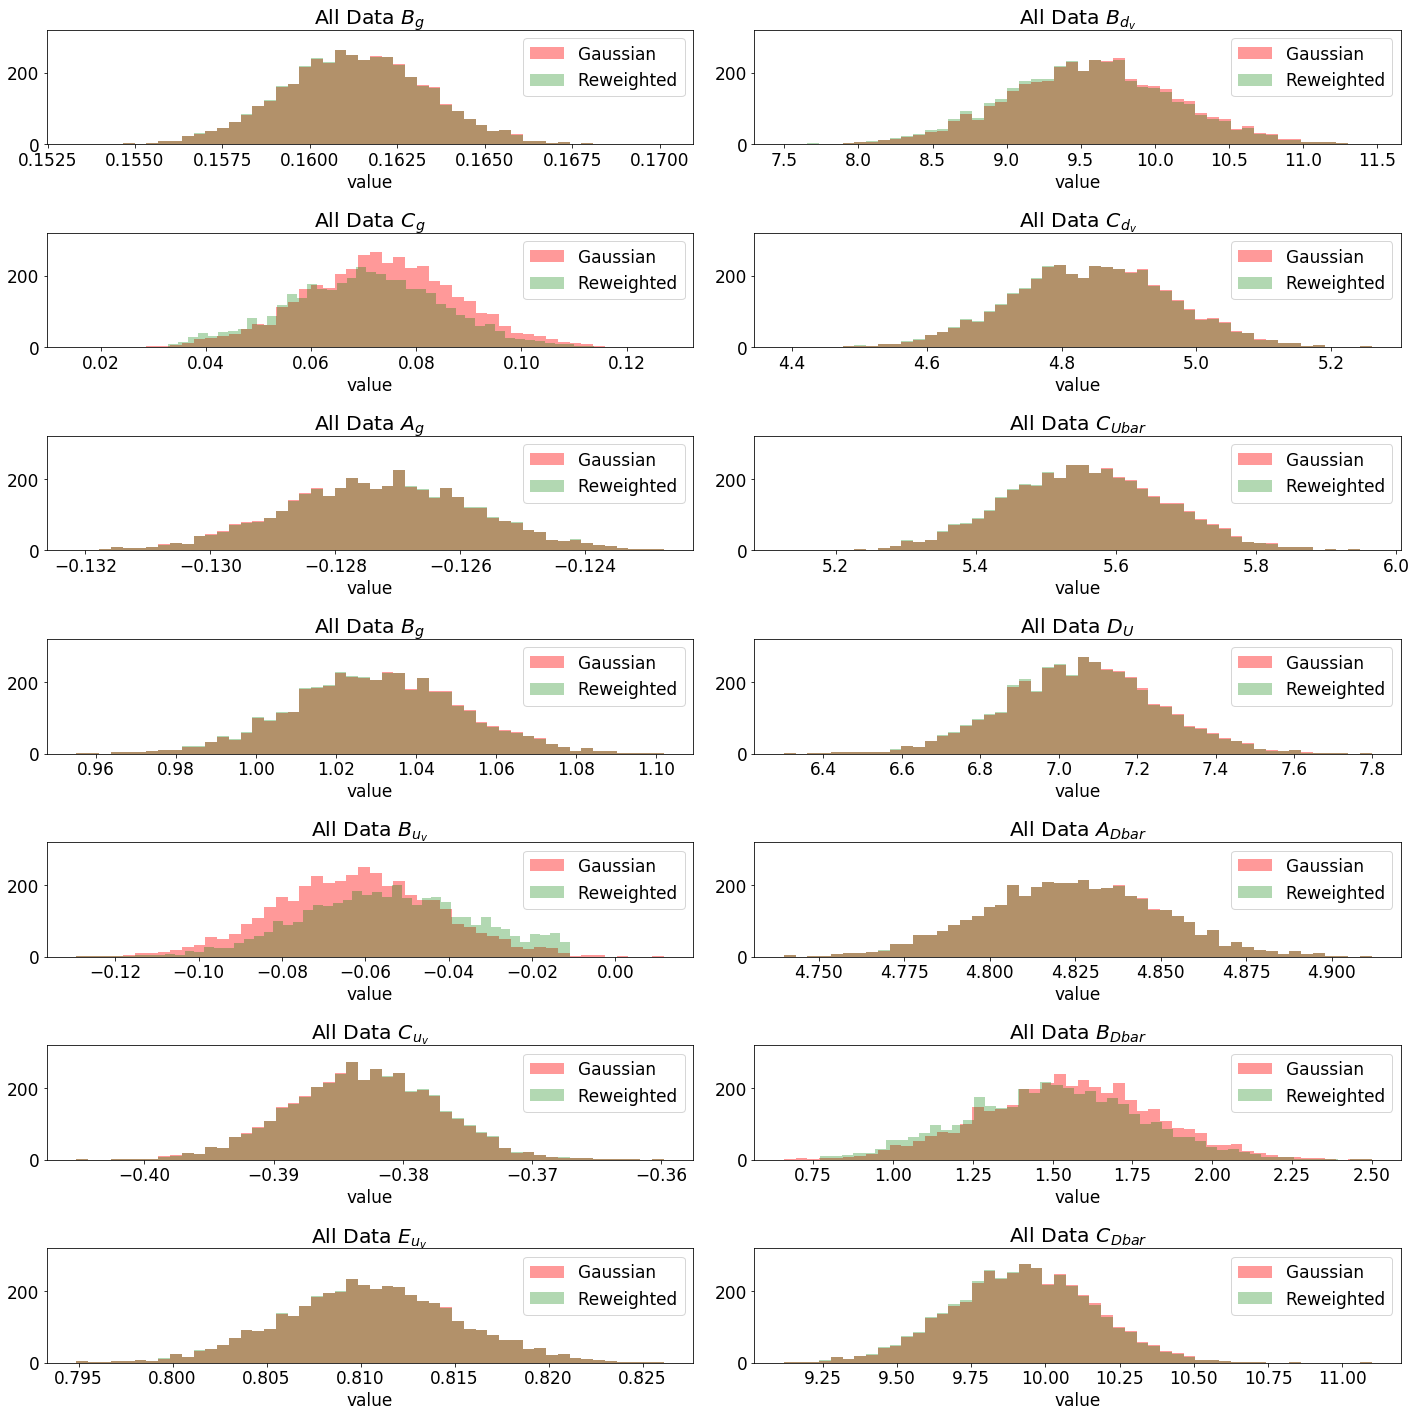

In [57]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(20,20))

for i in range(7):
    axes[i,0].hist(MVN_4000_MASTER[:,i].flatten(), bins=50, color = 'r', alpha=0.4,label='Gaussian')
    axes[i,0].hist(np.array(list_of_tuples[i][0]), weights=np.array(list_of_tuples[i][1]), bins=50, color = 'g',alpha=0.3, label='Reweighted')
    #axes[i,1].set(title=titles[i] + ' Weighted', xlabel='value')
    axes[i,0].set_title('All Data '+ titles[i] )
    axes[i,0].set_xlabel('value')
    axes[i,0].set_ylim(0,320)
    axes[i,0].legend()
for j in range(0,7):
    axes[j,1].hist(MVN_4000_MASTER[:,j+7].flatten(), bins=50, color = 'r', alpha=0.4,label='Gaussian')
    axes[j,1].hist(np.array(list_of_tuples[j+7][0]), weights=np.array(list_of_tuples[j+7][1]), bins=50, color = 'g',alpha=0.3, label='Reweighted')
    #axes[i,1].set(title=titles[i] + ' Weighted', xlabel='value')
    axes[j,1].set_title('All Data ' +titles[j+7] )
    axes[j,1].set_xlabel('value')
    axes[j,1].set_ylim(0,320)
    axes[j,1].legend()
    
plt.tight_layout()
plt.show()

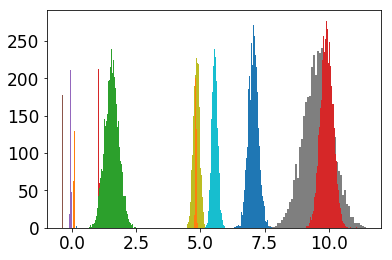

In [54]:
hists_unweighted=[]; hists_weighted = []
bins_unweighted=[]; bins_weighted=[]
for i in range(14):
    hist, bins, pathces = plt.hist(MVN_4000_MASTER[:,i].flatten(), bins=50)
    hists_unweighted.append(hist)
    bins_unweighted.append(bins)
#     axes[i,0].hist(MVN_4000_MASTER[:,i].flatten(), bins=50, color = 'r', alpha=0.4,label='Gaussian')
#     axes[i,0].hist(np.array(list_of_tuples[i][0]), weights=np.array(list_of_tuples[i][1]), bins=50, color = 'g',alpha=0.3, label='Reweighted')
    #axes[i,1].set(title=titles[i] + ' Weighted', xlabel='value')
#     axes[i,0].set_title(titles[i] )
#     axes[i,0].set_xlabel('value')
#     axes[i,0].set_ylim(0,320)
#     axes[i,0].legend(

central credible intervals and compare for Gaussian case ($1\sigma$)

# Normality tests and other experimental analysis (you can stop here)
* Quantile-Quantile Plot
* Shapiro-Wilk Test
* D’Agostino’s K^2 Test
* Anderson-Darling Test


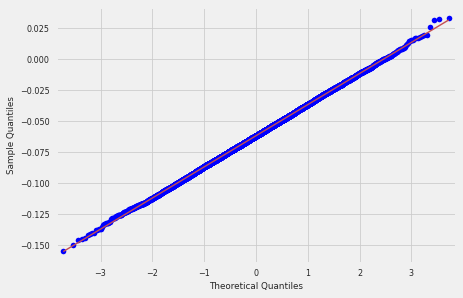

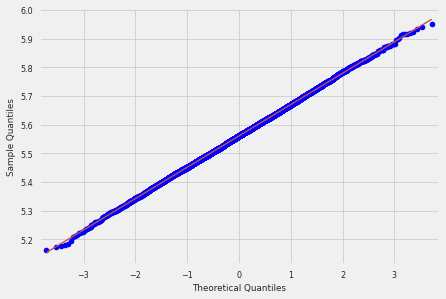

In [44]:

# QQ Plot
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

# generate univariate observations
data = MVN[:,0]
# q-q plot
qqplot(data, line='s')
qqplot(MVN[:,1], line='s')
plt.show()
qqplot()

/home/ali/anaconda3/lib/python3.7/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


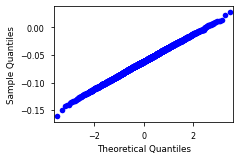

In [55]:

# QQ Plot
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
import statsmodels.api as sm

fig = plt.figure()
#add_subplot(nrows, ncols, index,
for i in range(14):
    
    ax_i = fig.add_subplot(14,2,1)
    sm.graphics.qqplot(MVN_4000[:-1,0], ax=ax_i)

fig.tight_layout()



In [48]:
fig, axes = plt.subplots(nrows=4, ncols=4,figsize=(10,15))
plt.tight_layout(); plt.suptitle('Quantile-Quantile Plots for HERAPDF Parameters')

data=[MVN[:,1],
MVN[:,2],
MVN[:,3],
MVN[:,4],
MVN[:,5],
MVN[:,6],
MVN[:,7],
MVN[:,8],
MVN[:,9],
MVN[:,10],
MVN[:,11],
MVN[:,12],
MVN[:,13],
MVN[:,13],
MVN[:,13], MVN[:,13]]

for i, ax in enumerate(axes.flatten()):
    qqplot(data[i], ax = ax, line='s')
    ax.set(title=titles[i], xlabel='value')
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9 , top=0.9, wspace=0.2, hspace=0.4)
plt.savefig('QQPlots_HERAPDF_params_MVN.png', dpi=300, bbox_inches='tight')
plt.show()

TypeError: subplots() got an unexpected keyword argument 'figsize'

In [86]:
MVN.mean(axis=0)

array([-0.06184643,  5.56076166,  0.16609947, -0.3830016 ,  0.81063873,
        4.82377368,  9.91781033,  1.02994792,  4.84452861,  7.06247647,
        1.54961056,  0.2687492 , -0.12733184,  9.57756398])

In [96]:
def get_weights(z, means, cov):
    z = np.array(z)
    
    mu = means # MVN.mean(axis=0)
    cov = np.array(cov)
    N = len(z)
    temp1 = np.linalg.det(cov) ** (-1/2)
    temp2 = np.exp(-.5 * (z - mu).T @ np.linalg.inv(cov) @ (z - mu))
    return (2 * np.pi) ** (-N/2) * temp1 * temp2

weights = [get_weights(z=MVN[i,:], means=MVN.mean(axis=0), cov=COV) for i in range(13)]
weights

[104560136489785.44,
 2505364279573.049,
 144178496690620.0,
 68390997857279.0,
 92724067291889.31,
 68760666252051.01,
 119585820770668.73,
 11586241649127.566,
 273628802968025.16,
 45510991440063.28,
 2083981922583.9834,
 301071762008.8873,
 54422488037567.71]

In [ ]:
np.at

In [62]:
MVN.shape

(10000, 14)

In [65]:
MVN[0,:]

array([-0.05576705,  5.50475402,  0.14701169, -0.38691152,  0.81555235,
        4.82721359, 10.07309451,  1.04433723,  4.88273049,  7.24707432,
        1.63580987,  0.27397891, -0.12541319, 10.40096359])

In [63]:
means.shape

(14,)

In [64]:
COV.shape

(14, 14)

In [67]:
# data=[MVN[:,1],
# MVN[:,2],
# MVN[:,3],
# MVN[:,4],
# MVN[:,5],
# MVN[:,6],
# MVN[:,7],
# MVN[:,8],
# MVN[:,9],
# MVN[:,10],
# MVN[:,11],
# MVN[:,12],
# MVN[:,13]]

def f(z, μ, Σ):
    """
    The density function of multivariate normal distribution.

    Parameters
    ---------------
    z: ndarray(float, dim=2)
        random vector, N by 1
    μ: ndarray(float, dim=1 or 2)
        the mean of z, N by 1
    Σ: ndarray(float, dim=2)
        the covarianece matrix of z, N by 1
    """

    z = np.array(z)
    μ = np.array(μ)
    Σ = np.array(Σ)

    N = z.size

    temp1 = np.linalg.det(Σ) ** (-1/2)
    temp2 = np.exp(-.5 * (z - μ).T @ np.linalg.inv(Σ) @ (z - μ))

    return (2 * np.pi) ** (-N/2) * temp1 * temp2

f(MVN[1,:], means, COV)

2437567593118.133

In [72]:
def my_mv_pdf(x, mu, cov):
    k = len(x)
    uu = mu.reshape(k,1)
    xx = x.reshape(k,1)
    t1 = (2*np.pi)**2
    t2 = np.linalg.det(cov)
    t3 = 1.0/np.sqrt(t1*t2)
    t4 =(xx-uu).T
    t5 = np.linalg.inv(cov)
    t6= (xx-uu)
    t7 = -0.5 *(np.dot(t4, t5).dot(t6))
    result = t3* np.exp(t7)
    return result
my_mv_pdf(MVN[1,:], means, COV)

array([[1.49980873e+17]])

In [74]:
class MultivariateNormal:
    """
    Class of multivariate normal distribution.

    Parameters
    ----------
    μ: ndarray(float, dim=1)
        the mean of z, N by 1
    Σ: ndarray(float, dim=2)
        the covarianece matrix of z, N by 1

    Arguments
    ---------
    μ, Σ:
        see parameters
    μs: list(ndarray(float, dim=1))
        list of mean vectors μ1 and μ2 in order
    Σs: list(list(ndarray(float, dim=2)))
        2 dimensional list of covariance matrices
        Σ11, Σ12, Σ21, Σ22 in order
    βs: list(ndarray(float, dim=1))
        list of regression coefficients β1 and β2 in order
    """

    def __init__(self, μ, Σ):
        "initialization"
        self.μ = np.array(μ)
        self.Σ = np.atleast_2d(Σ)

    def partition(self, k):
        """
        Given k, partition the random vector z into a size k vector z1
        and a size N-k vector z2. Partition the mean vector μ into
        μ1 and μ2, and the covariance matrix Σ into Σ11, Σ12, Σ21, Σ22
        correspondingly. Compute the regression coefficients β1 and β2
        using the partitioned arrays.
        """
        μ = self.μ
        Σ = self.Σ

        self.μs = [μ[:k], μ[k:]]
        self.Σs = [[Σ[:k, :k], Σ[:k, k:]],
                   [Σ[k:, :k], Σ[k:, k:]]]

        self.βs = [self.Σs[0][1] @ np.linalg.inv(self.Σs[1][1]),
                   self.Σs[1][0] @ np.linalg.inv(self.Σs[0][0])]

    def cond_dist(self, ind, z):
        """
        Compute the conditional distribution of z1 given z2, or reversely.
        Argument ind determines whether we compute the conditional
        distribution of z1 (ind=0) or z2 (ind=1).

        Returns
        ---------
        μ_hat: ndarray(float, ndim=1)
            The conditional mean of z1 or z2.
        Σ_hat: ndarray(float, ndim=2)
            The conditional covariance matrix of z1 or z2.
        """
        β = self.βs[ind]
        μs = self.μs
        Σs = self.Σs

        μ_hat = μs[ind] + β @ (z - μs[1-ind])
        Σ_hat = Σs[ind][ind] - β @ Σs[1-ind][1-ind] @ β.T

        return μ_hat, Σ_hat
multi_normal = MultivariateNormal(means, COV)
multi_normal

In [13]:
cov_list[5] = [0.460E-04, -0.829E-04, -0.565E-04, -0.914E-05, 0.403E-04, 0.861E-03] 
cov_list[6]= [0.165E-03, 0.298E-04,-0.274E-03,-0.198E-04,-0.574E-03, 0.421E-02, 0.755E-01]
cov_list[7] = [0.510E-04, 0.855E-04,-0.644E-04,-0.101E-04,-0.111E-04,-0.975E-05,-0.446E-03, 0.540E-03]
cov_list[8] =[0.246E-03,-0.593E-03,-0.290E-03,-0.491E-04, 0.140E-04,-0.398E-03, 0.296E-02, 0.170E-02, 0.158E-01 ]
cov_list[9] =[0.935E-03,-0.214E-02,-0.136E-02,-0.173E-03, 0.242E-03, 0.473E-03, 0.194E-03, 0.662E-03, 0.120E-03, 0.498E-01]
cov_list[10] = [-0.191E-02, 0.429E-02, 0.264E-02, 0.335E-03,-0.221E-03,-0.661E-03, 0.638E-02,-0.487E-03,-0.170E-02, 0.253E-01, 0.982E-01 ]
cov_list[11] = [-0.774E-05, 0.139E-04, 0.497E-05, 0.232E-05, 0.327E-05,-0.318E-06, 0.436E-04, 0.570E-05, 0.243E-06, 0.168E-04,-0.739E-04, 0.156E-04]
cov_list[12] = [-0.558E-05,-0.582E-06, 0.425E-05, 0.155E-05, 0.768E-06,-0.388E-07, 0.580E-05, 0.193E-05,-0.315E-05, 0.182E-04,-0.388E-04, 0.518E-05, 0.304E-05]
cov_list[13] = [0.349E-02,-0.135E-01,-0.437E-02,-0.589E-03, 0.215E-03, 0.131E-04,-0.652E-02, 0.240E-02, 0.188E-02,-0.218E-01, 0.363E-01, 0.110E-03, 0.182E-04, 0.370E+00]


cov_list

[[0.000632],
 [0.000872, 0.0117],
 [-0.000844, -0.000893, 0.0012],
 [-0.000122, -0.00015, 0.000197, 5.81e-05],
 [9.37e-06, 2.23e-05, -8.33e-06, -1.98e-06, 2.87e-05],
 [4.6e-05, -8.29e-05, -5.65e-05, -9.14e-06, 4.03e-05, 0.000861],
 [0.000165, 2.98e-05, -0.000274, -1.98e-05, -0.000574, 0.00421, 0.0755],
 [5.1e-05,
  8.55e-05,
  -6.44e-05,
  -1.01e-05,
  -1.11e-05,
  -9.75e-06,
  -0.000446,
  0.00054],
 [0.000246,
  -0.000593,
  -0.00029,
  -4.91e-05,
  1.4e-05,
  -0.000398,
  0.00296,
  0.0017,
  0.0158],
 [0.000935,
  -0.00214,
  -0.00136,
  -0.000173,
  0.000242,
  0.000473,
  0.000194,
  0.000662,
  0.00012,
  0.0498],
 [-0.00191,
  0.00429,
  0.00264,
  0.000335,
  -0.000221,
  -0.000661,
  0.00638,
  -0.000487,
  -0.0017,
  0.0253,
  0.0982],
 [-7.74e-06,
  1.39e-05,
  4.97e-06,
  2.32e-06,
  3.27e-06,
  -3.18e-07,
  4.36e-05,
  5.7e-06,
  2.43e-07,
  1.68e-05,
  -7.39e-05,
  1.56e-05],
 [-5.58e-06,
  -5.82e-07,
  4.25e-06,
  1.55e-06,
  7.68e-07,
  -3.88e-08,
  5.8e-06,
  1.93e-06

In [68]:
cov_list_list = [[None]*14]*14;

In [75]:
COV = np.empty((14,14))
for i in range(len(COV)):
    cov_list_list[i]= cov_list[i]
#     for j in range(len(COV[i])):
#         COV[i][j] = cov_list_list[i][j]
            
#COV
cov_list_list

[[0.000632],
 [0.000872, 0.0117],
 [-0.000844, -0.000893, 0.0012],
 [-0.000122, -0.00015, 0.000197, 5.81e-05],
 [9.37e-06, 2.23e-05, -8.33e-06, -1.98e-06, 2.87e-05],
 [4.6e-05, -8.29e-05, -5.65e-05, -9.14e-06, 4.03e-05, 0.000861],
 [0.000165, 2.98e-05, -0.000274, -1.98e-05, -0.000574, 0.00421, 0.0755],
 [5.1e-05,
  8.55e-05,
  -6.44e-05,
  -1.01e-05,
  -1.11e-05,
  -9.75e-06,
  -0.000446,
  0.00054],
 [0.000246,
  -0.000593,
  -0.00029,
  -4.91e-05,
  1.4e-05,
  -0.000398,
  0.00296,
  0.0017,
  0.0158],
 [0.000935,
  -0.00214,
  -0.00136,
  -0.000173,
  0.000242,
  0.000473,
  0.000194,
  0.000662,
  0.00012,
  0.0498],
 [-0.00191,
  0.00429,
  0.00264,
  0.000335,
  -0.000221,
  -0.000661,
  0.00638,
  -0.000487,
  -0.0017,
  0.0253,
  0.0982],
 [-7.74e-06,
  1.39e-05,
  4.97e-06,
  2.32e-06,
  3.27e-06,
  -3.18e-07,
  4.36e-05,
  5.7e-06,
  2.43e-07,
  1.68e-05,
  -7.39e-05,
  1.56e-05],
 [-5.58e-06,
  -5.82e-07,
  4.25e-06,
  1.55e-06,
  7.68e-07,
  -3.88e-08,
  5.8e-06,
  1.93e-06

In [6]:
# for line in chain_cov_mat:
#     row = line.strip().split()
#     for i in range(14):
#         for row_val in row[i].split():
            
#             for j in range(14):
#                 for col_val in row[i][j].split():
#                     COV[row_val][col] = float(row[i][j])
cov_list=[]
COV = np.empty((14,14))

# delimeters = "-", " "
# regexPattern = '|'.join(map(re.escape, delimiters))
pattern = re.compile(r'[\s\S.\d\D\w\W]\d\.\d\d\d[E]-\d\d')
#matches = pattern.finditer(text_to_search)
# for match in matches:
#     print(match)
for line in lines[127:143]:
    rows = line.strip().split('\n')
    triang_rows = rows[0]
#     for row in triang_rows.split('\n'):

    for row in triang_rows.strip().split('\s'):

        matches = pattern.finditer(row)
        inner_list=[]
        for match in matches:
            inner_list.append(float(row[match.span()[0]:match.span()[1]]))
            #cov_list.append(float(row[match.span()[0]:match.span()[1]]))
        cov_list.append(inner_list)
#         split_row = re.split(regexPattern, row)
#         for val in split_row:
#             cov_list.append(float(val))
        
        #for val in row:
            
#     for value in value_0:
        
#         cov_list.append(float(value))
cov_list

[[],
 [0.0117],
 [-0.000844, -0.000893, 0.0012],
 [-0.000122, -0.00015, 0.000197, 5.81e-05],
 [2.23e-05, -8.33e-06, -1.98e-06, 2.87e-05],
 [-8.29e-05, -5.65e-05, -9.14e-06, 4.03e-05, 0.000861],
 [2.98e-05, -0.000274, -1.98e-05, -0.000574, 0.00421, 0.0755],
 [8.55e-05, -6.44e-05, -1.01e-05, -1.11e-05, -9.75e-06, -0.000446, 0.00054],
 [-0.000593, -0.00029, -4.91e-05, 1.4e-05, -0.000398, 0.00296, 0.0017, 0.0158],
 [-0.00214,
  -0.00136,
  -0.000173,
  0.000242,
  0.000473,
  0.000194,
  0.000662,
  0.00012,
  0.0498],
 [-0.00191,
  0.00429,
  0.00264,
  0.000335,
  -0.000221,
  -0.000661,
  0.00638,
  -0.000487,
  -0.0017,
  0.0253,
  0.0982],
 [-7.74e-06,
  1.39e-05,
  4.97e-06,
  2.32e-06,
  3.27e-06,
  -3.18e-07,
  4.36e-05,
  5.7e-06,
  2.43e-07,
  1.68e-05,
  -7.39e-05],
 [],
 [-5.58e-06,
  -5.82e-07,
  4.25e-06,
  1.55e-06,
  7.68e-07,
  -3.88e-08,
  5.8e-06,
  1.93e-06,
  -3.15e-06,
  1.82e-05,
  -3.88e-05],
 [3.04e-06],
 [-0.0135,
  -0.00437,
  -0.000589,
  0.000215,
  1.31e-05,
 

In [5]:
cov_list[0] = [0.632e-03]
cov_list[1] = [0.872E-03, 0.117E-01]
cov_list[:4]

[[0.000632],
 [0.000872, 0.0117],
 [-0.000844, -0.000893, 0.0012],
 [-0.000122, -0.00015, 0.000197, 5.81e-05]]

In [5]:
COV = np.empty((14,14))


array([[6.93445134e-310, 6.93445134e-310, 4.68246689e-310,
        4.68246689e-310, 0.00000000e+000, 0.00000000e+000,
                    nan, 0.00000000e+000, 6.93425785e-310,
        0.00000000e+000, 4.44659081e-323, 6.93440483e-310,
        4.68246623e-310,             nan],
       [0.00000000e+000,             nan, 0.00000000e+000,
        6.93425785e-310, 3.55727265e-322, 5.43472210e-323,
        6.93440483e-310, 4.68246623e-310, 1.48219694e-323,
        1.38338381e-322,             nan, 0.00000000e+000,
        6.93425785e-310, 7.11454530e-322],
       [5.43472210e-323, 6.93440483e-310, 4.68246623e-310,
        9.88131292e-324, 1.58101007e-322,             nan,
        0.00000000e+000, 6.93425785e-310, 1.06718180e-321,
        5.43472210e-323, 6.93440483e-310, 4.68246623e-310,
        0.00000000e+000, 1.58101007e-322],
       [            nan, 4.94065646e-323, 6.93425785e-310,
        1.42290906e-321, 3.95252517e-323, 6.93440483e-310,
        4.68246623e-310, 0.00000000e+000, 7.9

In [138]:
len(cov_list)

15

In [15]:
length = max(map(len, cov_list))
cov = np.array([xi+[None]*(length-len(xi)) for xi in cov_list])
cov.shape

(15, 14)

Now that we have the fit parameters extracted from minuit.out.txt, and we have generated new parameters given the uncertainties in these new parameters, we write those new generated parameters to new minuit.in.txt files, to do new fits with those new generated parameters. Below we write new minuit.in.txt files given those new generated parameter values

In [71]:
############WRITE GENERATED PARAMETERS INTO NEW MINUIT.IN FILE
with open('minuit_ex.in.txt', 'w') as second:
    second.write('set title\n')
    second.write('new  14p HERAPDF\n')
    second.write('parameters\n')
    #lets put 0 for the fourth column, meaning that this parameter is fixed
    second.write('    '+ '2'+ '    ' + "'Bg'"+'    '+str(generated_params[0])+ '    '+'0.\n')
    second.write('    '+ '3'+ '    ' + "'Cg'"+'    '+str(generated_params[1])+ '    '+'0.\n')
    second.write('    '+ '7'+ '    ' + "'Aprig'"+'    '+str(generated_params[2])+ '    '+'0.\n')
    second.write('    '+ '8'+ '    ' + "'Bprig'"+'    '+str(generated_params[3])+ '    '+'0.\n')
    second.write('    '+ '9'+ '    ' + "'Cprig'"+'    '+str(generated_params[4])+ '    '+'0.\n')
    second.write('    '+ '12'+ '    ' + "'Buv'"+'    '+str(generated_params[5])+ '    '+'0.\n')
    second.write('    '+ '13'+ '    ' + "'Cuv'"+'    '+str(generated_params[6])+ '    '+'0.\n')
    second.write('    '+ '15'+ '    ' + "'Euv'"+'    '+str(generated_params[7])+ '    '+'0.\n')
    second.write('    '+ '22'+ '    ' + "'Bdv'"+'    '+str(generated_params[8])+ '    '+'0.\n')
    second.write('    '+ '23'+ '    ' + "'Cdv'"+'    '+str(generated_params[9])+ '    '+'0.\n')
    second.write('    '+ '33'+ '    ' + "'CUbar'"+'    '+str(generated_params[10])+ '    '+'0.\n')
    second.write('    '+ '34'+ '    ' + "'DUbar'"+'    '+str(generated_params[11])+ '    '+'0.\n')
    second.write('    '+ '41'+ '    ' + "'ADbar'"+'    '+str(generated_params[12])+ '    '+'0.\n')
    second.write('    '+ '42'+ '    ' + "'BDbar'"+'    '+str(generated_params[13])+ '    '+'0.\n')
    second.write('    '+ '43'+ '    ' + "'CDbar'"+'    '+str(generated_params[14])+ '    '+'0.\n')
    second.write('\n\n\n')
    second.write('migrad 200000\n')
    second.write('hesse\n')
    second.write('hesse\n')
    second.write('set print 3\n\n')
    second.write('return')
#we dont have to close it since we are using a context manager "with open()"

### To do: 
Automate everything with class and formatting. We can also do it with formatting options of course, using .format(...).
This is just a proof of concept experiment



### Using numpy

In [1]:
import itertools as IT
with open(filename, 'r') as f:
    lines = IT.chain(IT.islice(f, 0, 4), IT.islice(f, 5, 14) )
arr = np.genfromtxt(lines)

In [25]:
import numpy as np
#make a list of dtypes for each of the columns that we want

dtype1 = np.dtype([('NO.', 'int'), ('NAME', 'str'), ('VALUE', 'float32'), ('ERROR', 'float32')])
a = np.loadtxt(filename, dtype=dtype1, skiprows=106,  max_rows=4, usecols=(0, 1, 2, 3))
#np.loadtxt(filename, dtype)
a['VALUE']

array([-0.061856,  5.5593  ,  0.16618 , -0.383   ], dtype=float32)

In [6]:
words

['43', 'CDbar', '9.5810', '0.60834', '0.53648E-02', '0.24546E-02']

### Using Pandas

In [16]:
import pandas as pd
df = pd.read_csv(filename, names=['NO','NAME','VALUE','ERROR'])[95:112]
#pd.read_csv(filename)ERROR
df.NO.apply(lambda x: pd.Series(str(x).split("\s+")))
#df.columns=['NO','NAME','VALUE','ERROR']

In [138]:
len(np.array(means))
means=np.array(means).astype(np.float)
means

/home/ali/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


array([-0.061856,  5.5593  ,  0.16618 , -0.383   , 25.      ,  0.81056 ,
        4.8239  ,  9.9226  ,  1.0301  ,  4.8456  ,  7.0603  ,  1.5439  ,
        0.26877 , -0.12732 ,  9.581   ,  0.118   ,  0.4     ,  0.      ])

### Generating a multivariate normal distribution from the parameter means and covarance matrix

The chi-squared test is a goodness-of-fit test, which evaluates how well your probability model fits the observed data. Suppose you have observed data $\mathcal{O} = \{ o_1, O-2, ...,o_N \}$ where $i$ is a given observed value, and model predictions $\mathcal{E}= \{ E_1, E_2, ..., E_N \}$ and the uncertainties $\sigma = \{ \sigma_1, \sigma_2, ..., \sigma_N$. The chi-squared parameter is
\begin{equation}
    \chi^2 = \sum_i \frac{(o_i -E_i)^2}{\sigma_i^2}
\end{equation}
\footnote{For a multivariate distribution, the chi-squared is given by $\chi^{2}(\vec{y}, \vec{t})=(\vec{y}-\vec{t})^{t} \Sigma^{-1}(\vec{y}-\vec{t})$ where $\vec{y}$ is the observations, $\vec{t}$ are the model predictions, and $\Sigma$ is the covariance matrix of the observations.}

Where $(o_i -E_i)^2 $ are called the residuals. Clearly, you want $\chi^2$ to be as low as possible for the best fit. However, it is possible for the $\chi^2$ to be too low (overfit). The way in which we can determine how good our fit is, is using the reduced chi-square which is
\begin{equation}
    \text{Reduced} \ \chi^2 = \frac{\chi^2}{\nu}
\end{equation}
Where $\nu$ is the number of degrees of freedom, which is given by
\begin{equation}
    \nu = N_{\text{observations}} - N_{\text{parameters in fit}}
\end{equation}

If the fit (model) is perfect, then Reduced $\chi^2 ~ 1$, which tells you that the scatter around your points, is about what you'd expect from the errors. If Reduced $\chi^2 > 1$ the fit (model) could be improved. If then Reduced $\chi^2 < 1$ the fit (model) is too close to the observed data, i.e. you have too complicated of a model, or that yor errors are too big.


Say that the likelihood for $\theta$ is multivariate normal, the likelihood function of a single observation is of the form 
\begin{equation}
    L(\boldsymbol{\theta} ; x)=\frac{1}{\sqrt{(2 \pi)^{D}|\boldsymbol{\Sigma}|}} \exp \left\{-\frac{1}{2}[x-g(\boldsymbol{\theta})]^{T} \boldsymbol{\Sigma}^{-1}[\boldsymbol{x}-\mathrm{g}(\boldsymbol{\theta})]\right\}
\end{equation}

Taking the log and dropping the const in the beginning (indep. of $\theta$, we have
\begin{equation}
    \log L(\boldsymbol{\theta} ; \boldsymbol{x})=-\frac{1}{2}[\boldsymbol{x}-\mathrm{g}(\boldsymbol{\theta})]^{\mathrm{T}} \boldsymbol{\Sigma}^{-1}[\boldsymbol{x}-\mathrm{g}(\boldsymbol{\theta})]
\end{equation}

Thus, $-2 log L$ is precisely the $\chi^2$ expression in the leaset squares method. \\

A popular method for estimating the errors in the maximum likelihood method is to look for parameters $\mathbf{\theta_{\pm}}$ for which
\begin{equation}
    -2 \Delta \log L \equiv-2\left[\log L\left(\boldsymbol{\theta}_{\pm} ; \boldsymbol{x}\right)-\log L(\hat{\boldsymbol{\theta}} ; x)\right]=1
\end{equation}

In [131]:

def covariance_matrix(X):
    m = len(X) 
    mean = np.mean(X)
    cov_matrix = (X - mean).T.dot((X - mean)) / m-1
    np.random.seed(2020)
    return cov_matrix + 0.00001 
cov_mat_sig = np.array(covariance_matrix(means))
cov_mat_sig

array(36.26220508)

In [50]:
filename = 'minuit.out.txt'
infile = open(filename, 'r')
lines = infile.readlines()
with open('minuit.in.txt', 'w') as second:
    for line in lines[9:n]:
        split_line = line.strip().split('      ')#the delimeter is 6 spaces to separate the columns
        for i in split_line:
            second.write(i)
infile.close()
second.close()